# IMPORT

In [30]:
# pip install nltk -q

In [31]:
# pip install spacy -q

In [32]:
# pip install spacytextblob -q

In [33]:
#!python -m spacy download en_core_web_sm -q

In [34]:
# pip install autocorrect -q

In [35]:
# pip install pyspellchecker -q

In [36]:
# pip install scikit-learn -q

In [37]:
# pip install gensim -q
#!pip install --upgrade gensim

In [38]:
# !pip install --upgrade scipy numpy

In [39]:
# !pip install --upgrade gensim

In [40]:
# pip install scipy==1.12

In [41]:
# pip install wordcloud -q

In [163]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

%matplotlib inline

import nltk
from nltk.corpus import abc # Tool for working with text in the field of natural language processing. 
from nltk.tokenize import sent_tokenize, word_tokenize # Tools for natural language processing, allowing text to be divided into its basic components: sentences and words.
from nltk.corpus import stopwords # These are common words that are removed from the text during text analysis to focus on the most relevant and meaningful words.
from nltk.stem import WordNetLemmatizer
from nltk.sentiment import SentimentIntensityAnalyzer
# nltk.download('stopwords')
# nltk.download('wordnet')
# nltk.download('abc')
#nltk.download('vader_lexicon')
# nltk.download('punkt') # Necessary to be able to use the tokenization functions.


import spacy 
from spacy import displacy
from spacytextblob.spacytextblob import SpacyTextBlob
from sklearn.feature_extraction.text import TfidfVectorizer


import spacy.cli
#spacy.cli.download("en_core_web_sm")


from autocorrect import Speller
from spellchecker import SpellChecker

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score

from wordcloud import WordCloud

import warnings
import gensim

import sys

# GENERAL VIEW

In [45]:
df = pd.read_csv("/Users/roraimachavez/Downloads/7.IRONHACK/Mini projects/nlp_disaster-tweets/data/train.csv")

`id` - a unique identifier for each tweet

`text` - the text of the tweet

`location` - the location the tweet was sent from (may be blank)

`keyword` - a particular keyword from the tweet (may be blank)

`target` - in train.csv only, this denotes whether a tweet is about a real disaster (1) or not (0)

In [46]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [47]:
target_suma = df["target"].value_counts()

In [48]:
target_suma

target
0    4342
1    3271
Name: count, dtype: int64

In [49]:
df.shape

(7613, 5)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [51]:
df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [52]:
df_nun = df.isnull().sum()
df_nun

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

# DATA PREPROCESSING¶

The procedures involved in the preparation of the text data included in our dataset using Natural Language Processing (NLP). Here are some of the typical actions that we will take:

**1. Lowercasing:** Convert all text to lowercase to standardize it.

**2. Removing URLs:** Eliminate any web links as they are usually not informative for text classification.

**3. Removing special characters and numbers:** These are typically not useful for understanding the sentiment or topic of the text.

**4. Tokenization:** Split text into individual words or tokens.

**5. Removing stopwords:** Stopwords are common words (such as “the”, “a”, etc.) that may not be useful in some types of text analysis.

**6. Lemmatization:** Reduce words to their base or root form but add context to bring out the true meaning.

We applied These preprocessing steps to the ‘text’ column of our training data.

In [53]:
# We only take the column we need for the analysis. In this case the text column. 

text_df = df[["text"]]
text_df.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [54]:
text_df['text_copy'] = text_df['text']

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/410629063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_copy'] = text_df['text']


In [55]:
text_df.head()

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or...","13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...,Just got sent this photo from Ruby #Alaska as ...


In [56]:
nlp = spacy.load("en_core_web_sm")
""" Modelo pre-entrenado para el idioma inglés que incluye componentes para tokenización, 
etiquetado POS (Part-of-Speech), análisis de dependencias y reconocimiento de entidades nombradas."""

' Modelo pre-entrenado para el idioma inglés que incluye componentes para tokenización, \netiquetado POS (Part-of-Speech), análisis de dependencias y reconocimiento de entidades nombradas.'

In [57]:
def process_text(text): 
    # Convert to lowercase
    text = text.lower()
       
    # Delete URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove special characters and numbers
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)  # Delete individual characters
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)  # Remove individual characters at startup
    text = re.sub(r'\s+', ' ', text, flags=re.I)  # Replace multiple spaces with a single space
    
    doc = nlp(text) # It is used to process a text using the NLP pre-trained model.
    
    return text.strip()  # Eliminate blank spaces at the beginning and end

text_df['text_copy'] = text_df['text_copy'].apply(process_text)

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/2183403282.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_copy'] = text_df['text_copy'].apply(process_text)


In [58]:
text_df.head()

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,our deeds are the reason of this earthquake ma...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all residents asked to shelter in place are be...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfires evacuation ord...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska as s...


#### `Lemmatization¶`

In [59]:
def short_words(text):
    # Inicializar el lematizador de WordNet
    wordNetLemmatizer = WordNetLemmatizer()

    # Lematizar el texto
    lemmatized_words = [wordNetLemmatizer.lemmatize(word) for word in text.split()]

    # Procesar el texto utilizando el modelo de SpaCy
    doc = nlp(" ".join(lemmatized_words))

    # Retornar el texto procesado
    return " ".join(lemmatized_words)

In [60]:
# Apply the function to the 'text_copy' column of the DataFrame
text_df['text_copy'] = text_df['text_copy'].apply(short_words)

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/3840599860.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_copy'] = text_df['text_copy'].apply(short_words)


In [61]:
text_df

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,our deed are the reason of this earthquake may...
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,all resident asked to shelter in place are bei...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,just got sent this photo from ruby alaska a sm...
...,...,...
7608,Two giant cranes holding a bridge collapse int...,two giant crane holding bridge collapse into n...
7609,@aria_ahrary @TheTawniest The out of control w...,aria_ahrary thetawniest the out of control wil...
7610,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,m1 94 01 04 utc 5km of volcano hawaii
7611,Police investigating after an e-bike collided ...,police investigating after an bike collided wi...


#### `Word Tokenization`

Word tokenization is the same as sentence tokenization. But, rather than applying it to sentences, it is used on words so that individual words are separated as items in a list.

In [62]:
# Tokenize each text in the list.
def token(word):
    return word_tokenize(word)

text_df['text_copy'] = text_df['text_copy'].apply(token)

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/210566928.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_copy'] = text_df['text_copy'].apply(token)


In [63]:
text_df.head()

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,"[our, deed, are, the, reason, of, this, earthq..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, resident, asked, to, shelter, in, place,..."
3,"13,000 people receive #wildfires evacuation or...","[13, 000, people, receive, wildfire, evacuatio..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala..."


#### `Stopword`

The dataset may contain words like ‘after,’ ‘every’ and ‘I.’ These words are not relevant to important NLP applications like the sentiment detection process. Thereby, these words can be deleted to minimize the burden on the system.

In [64]:
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [65]:
sp = spacy.load('en_core_web_sm')

In [66]:
def stop_words(row):
    stop_words = set(stopwords.words('english')) # This returns a list of predefined stop words in English. 
    spacy_stopwords = sp.Defaults.stop_words # Words ignored in word processing because they are considered uninformative or irrelevant.
    
    filtered_words = []
    
    for word in row:
        if word not in stop_words and word not in spacy_stopwords:
            filtered_words.append(word)
  
    return " ".join(filtered_words)

In [67]:
text_df['text_copy'] = text_df['text_copy'].apply(stop_words)
text_df.head()

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/3684853451.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_df['text_copy'] = text_df['text_copy'].apply(stop_words)


,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...


# FEATURE ENGINEERING¶

#### `Word Embedding`

In [68]:
text_df_copy = text_df.copy()

In [69]:
text_df_copy.head()

,text,text_copy
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...


In [70]:
text_df_copy["text_copy"][0]

'deed reason earthquake allah forgive u'

In [71]:
doc = nlp(" ".join(text_df_copy["text_copy"][0]))

In [72]:
doc[0].vector

array([-0.05714139, -0.2078143 ,  0.16351837,  0.42955005,  0.03189373,
       -0.52794844, -0.39352763,  1.644515  , -0.75878984, -0.7884784 ,
        0.41033214,  0.79316396, -0.24447441, -0.16587707,  0.03596339,
        0.4859343 , -0.53095454, -1.9986045 , -1.0497782 ,  0.22114097,
        0.2929525 , -0.6514785 ,  0.12502253, -0.47627443,  0.47887692,
       -0.4992665 , -0.07493235,  0.52870494, -1.1748424 ,  0.6048299 ,
       -0.38298416,  0.06873831,  0.20136282, -0.7493609 ,  1.2595787 ,
        0.26748765,  0.22100943,  2.1227496 , -0.23161018,  1.0414941 ,
       -0.64528185, -0.8891695 , -0.6364651 ,  0.15599352, -0.65656126,
       -0.09522307,  0.64413303,  0.49070483, -0.10887469, -0.3912642 ,
       -0.12851286, -0.16384898, -0.11358854,  0.15621   ,  0.6547197 ,
       -0.50752735,  0.7782661 , -0.5842383 , -0.05052797, -0.9879688 ,
       -1.6659888 ,  0.03443813,  1.637214  , -0.51893926, -0.6081762 ,
        0.40033418, -0.8062353 , -1.207003  ,  0.6985196 ,  0.00

In [73]:
word_embeddings = []

# Iterar sobre cada fila del DataFrame
for index, row in text_df_copy.iterrows():
    text = row["text_copy"]
    doc = nlp(text)
    if len(doc) > 0:
        vector = doc[0].vector  # Puedes ajustar esto según tus necesidades
    else:
        vector = None
    word_embeddings.append(vector)

# Agregar la lista de vectores como una nueva columna en el DataFrame
text_df_copy["word embedding"] = word_embeddings

In [74]:
text_df_copy.head()

,text,text_copy,Word Embedding
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473..."
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655..."
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044..."
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748..."
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241..."


#### `Sentiment Analysis`

In [77]:
text_sa = text_df_copy.copy()

In [79]:
text_sa.head()

,text,text_copy,Word Embedding
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473..."
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655..."
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044..."
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748..."
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241..."


In [81]:
sia = SentimentIntensityAnalyzer()

In [83]:
polarity_scores1 = sia.polarity_scores(text_df_copy["text_copy"][0])

In [84]:
polarity_scores1

{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'compound': 0.2732}

In [85]:
# Inicializar una lista para almacenar los resultados de análisis de sentimiento
sentiment_analysis = []

# Iterar sobre cada fila del DataFrame
for index, row in text_df_copy.iterrows():
    text = row["text_copy"]
    
    # Obtener las puntuaciones de polaridad
    polarity_scores = sia.polarity_scores(text)
   
    # Agregar el resultado a la lista
    sentiment_analysis.append(polarity_scores)

# Agregar la lista de análisis de sentimiento como una nueva columna en el DataFrame
text_sa["sentiment analysis"] = sentiment_analysis

In [87]:
text_sa.head()

,text,text_copy,Word Embedding,sentiment analysis
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp..."
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp..."
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


**Another way to do it** 

1. Inicializa el SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

2. Define una función que aplique el análisis de sentimiento a un texto y devuelva los resultados

def analyze_sentiment(text):
    return sia.polarity_scores(text)

3. Aplica la función a cada fila del DataFrame en la columna ‘text_copy’
 
text_df_copy[‘sentiment’] = text_df_copy[‘text_copy’].apply(analyze_sentiment)

Ahora creamos una columna por score.

In [106]:
# Expande los resultados del análisis de sentimiento en columnas separadas y agrégalas al DataFrame existente

sentiment_scores = text_sa["sentiment analysis"].apply(pd.Series) # Series función para expandir de dict a column

text_df_sa = pd.concat([text_sa, sentiment_scores], axis=1)

In [107]:
text_df_sa.head()

,text,text_copy,Word Embedding,sentiment analysis,neg,neu,pos,compound
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000


In [108]:
max_neg = text_df_sa["neg"].max()
min_neg = text_df_sa["pos"].min()
max_neg,min_neg

(1.0, 0.0)

`Prediction Column`

In [146]:
# Inicializar una lista para almacenar las predicciones
predictions = []

# Iterar sobre cada fila para calcular la predicción basada en las condiciones
for index, row in text_df_sa.iterrows():
    if row['neg'] > 0.4 and row['pos'] < 0.3:
        predictions.append(1)
    else:
        predictions.append(0)

# Agregar la lista de predicciones como una nueva columna en el DataFrame
text_df_sa['prediction'] = predictions

In [156]:
# Inicializar una lista para almacenar las predicciones
predictions = []

# Iterar sobre cada fila para calcular la predicción basada en las condiciones
for index, row in text_df_sa.iterrows():
    if row['neg'] > 0.2 and row['pos'] < 0.15:
        predictions.append(1)
    else:
        predictions.append(0)

# Agregar la lista de predicciones como una nueva columna en el DataFrame
text_df_sa['heuristic'] = predictions

In [189]:
text_df_sa.head()

,text,text_copy,Word Embedding,sentiment analysis,neg,neu,pos,compound,prediction,heuristic
0,Our Deeds are the Reason of this #earthquake M...,deed reason earthquake allah forgive u,"[-0.21917826, 0.007227294, 0.5737411, -0.10473...","{'neg': 0.0, 'neu': 0.656, 'pos': 0.344, 'comp...",0.000,0.656,0.344,0.2732,0,0
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada,"[-0.06903696, -0.9033648, 0.07564641, -0.52655...","{'neg': 0.286, 'neu': 0.714, 'pos': 0.0, 'comp...",0.286,0.714,0.000,-0.3400,0,1
2,All residents asked to 'shelter in place' are ...,resident asked shelter place notified officer ...,"[-1.0823898, -0.91871154, -0.24414432, -0.0044...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0
3,"13,000 people receive #wildfires evacuation or...",13 000 people receive wildfire evacuation orde...,"[-0.25528115, -0.06456956, 1.9694998, 0.988748...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfire pour...,"[-0.46194184, 0.484293, 0.016602844, 0.8399241...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.000,1.000,0.000,0.0000,0,0


In [148]:
text_df_sa["prediction"].value_counts()

prediction
0    5957
1    1656
Name: count, dtype: int64

In [157]:
text_df_sa["heuristic"].value_counts()

heuristic
0    4803
1    2810
Name: count, dtype: int64

In [145]:
df["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

# CLASSIFICATION REPORT

In [151]:
pred = text_df_sa["prediction"]
heu = text_df_sa["heuristic"]
target = df["target"]

`Prediction test`

In [159]:
pre_prediction = classification_report(y_pred = pred, y_true = target)
print(pre_prediction)

              precision    recall  f1-score   support

           0       0.60      0.82      0.69      4342
           1       0.53      0.27      0.35      3271

    accuracy                           0.58      7613
   macro avg       0.56      0.54      0.52      7613
weighted avg       0.57      0.58      0.55      7613



`Heuristic test`

In [158]:
heu_prediction = classification_report(y_pred = heu, y_true = target)
print(heu_prediction)

              precision    recall  f1-score   support

           0       0.63      0.74      0.68      4342
           1       0.55      0.42      0.48      3271

    accuracy                           0.60      7613
   macro avg       0.59      0.58      0.58      7613
weighted avg       0.59      0.60      0.59      7613



# VISUALIZATION

In [168]:
text_ok = text_df_sa["text_copy"]

In [171]:
final_df = pd.concat([df, text_ok], axis=1)
final_df.head()

,id,keyword,location,text,target,text_copy
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquake allah forgive u
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near la ronge sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resident asked shelter place notified officer ...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,13 000 people receive wildfire evacuation orde...
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo ruby alaska smoke wildfire pour...


In [172]:
final_df.shape

(7613, 6)

**TWEETS DISTRIBUTION**

In [184]:
final_df["target"].value_counts()

target
0    4342
1    3271
Name: count, dtype: int64

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/3966425840.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=final_df, palette='Blues')


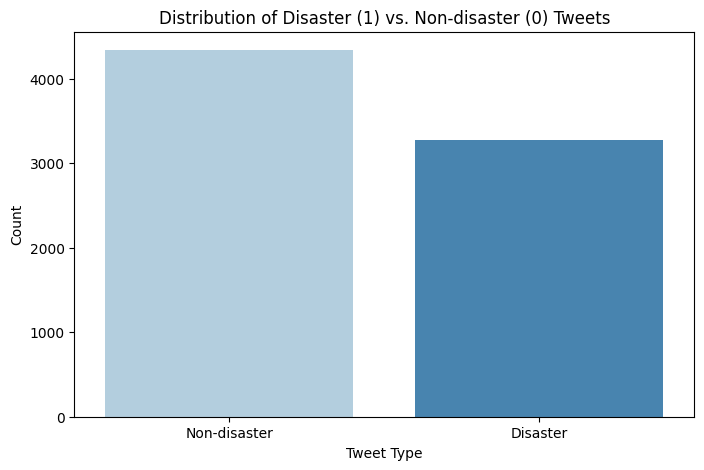

In [183]:
# Plotting the distribution of the target variable
plt.figure(figsize=(8, 5))
sns.countplot(x='target', data=final_df, palette='Blues')
plt.title('Distribution of Disaster (1) vs. Non-disaster (0) Tweets')
plt.xlabel('Tweet Type')
plt.ylabel('Count')
plt.xticks([0, 1], ['Non-disaster', 'Disaster'])
plt.show()

**WORD CLOUD**

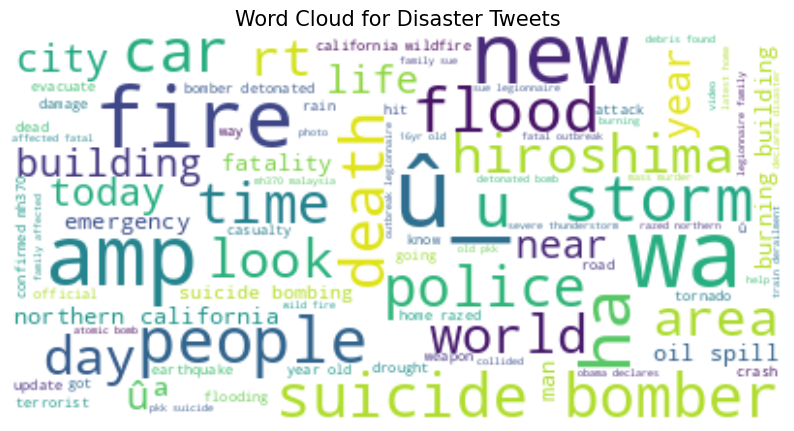

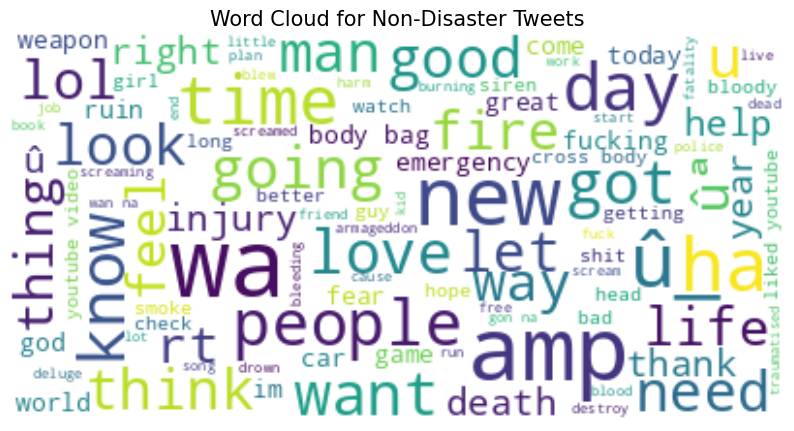

In [174]:
# Function to generate a word cloud
def generate_word_cloud(data, title):
    text = " ".join(review for review in data)
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=15)
    plt.axis("off")
    plt.show()

# Generate word clouds for disaster and non-disaster tweets
disaster_tweets = final_df[final_df['target'] == 1]['text_copy']
non_disaster_tweets = final_df[final_df['target'] == 0]['text_copy']

generate_word_cloud(disaster_tweets, "Word Cloud for Disaster Tweets")
generate_word_cloud(non_disaster_tweets, "Word Cloud for Non-Disaster Tweets")

**Distribution of tweets lenghts by target**

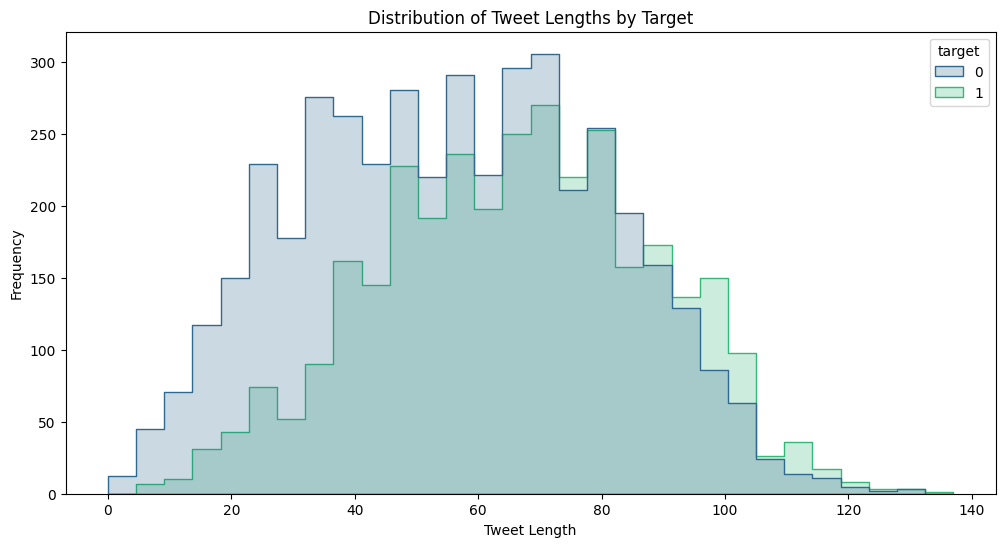

In [178]:
# Calculate the length of each tweet
final_df['tweet_length'] = final_df['text_copy'].apply(len)

# Plot settings
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='tweet_length', hue='target', element='step', palette='viridis', bins=30)
plt.title('Distribution of Tweet Lengths by Target')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.show()

**CORRELATION BETWEEN 
TWEET LENGTH VS WORDCOUNT**

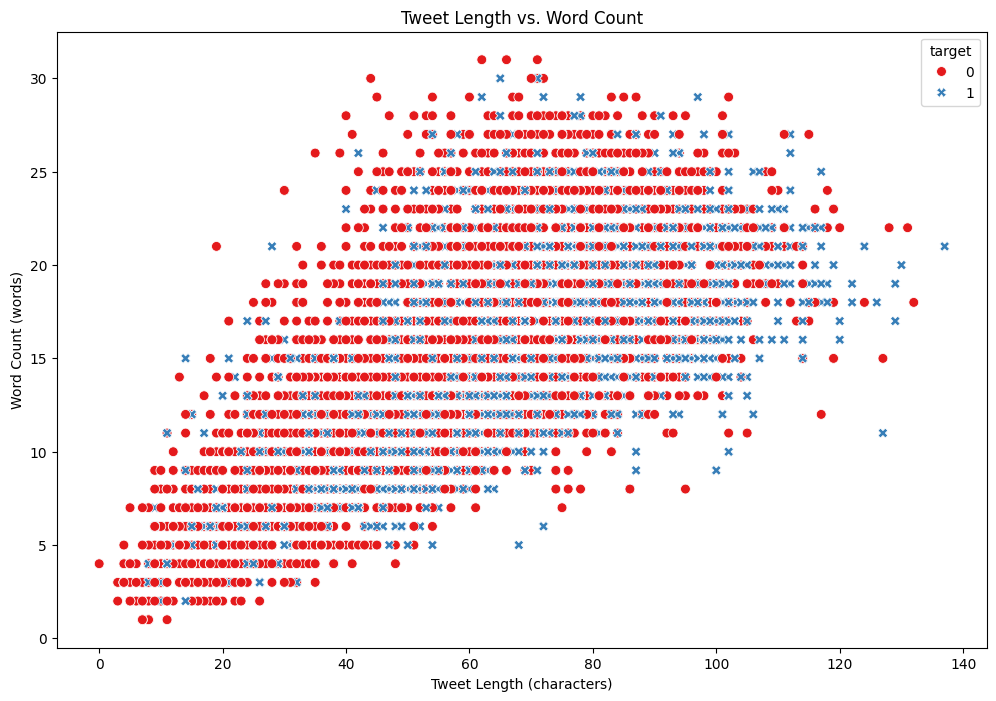

In [186]:
final_df["word_count"] = final_df["text"].apply(lambda x: len(x.split()))

plt.figure(figsize=(12, 8))
sns.scatterplot(data=final_df, x="tweet_length", y="word_count", hue="target", style="target", palette="Set1", s=50)
plt.title("Tweet Length vs. Word Count")
plt.xlabel("Tweet Length (characters)")
plt.ylabel("Word Count (words)")
plt.savefig("grafico.png")
plt.show()

**Top 10 locations for tweets**

/var/folders/__/k53x5x752318rh35q54k32m80000gn/T/ipykernel_3984/1615343719.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette="plasma")


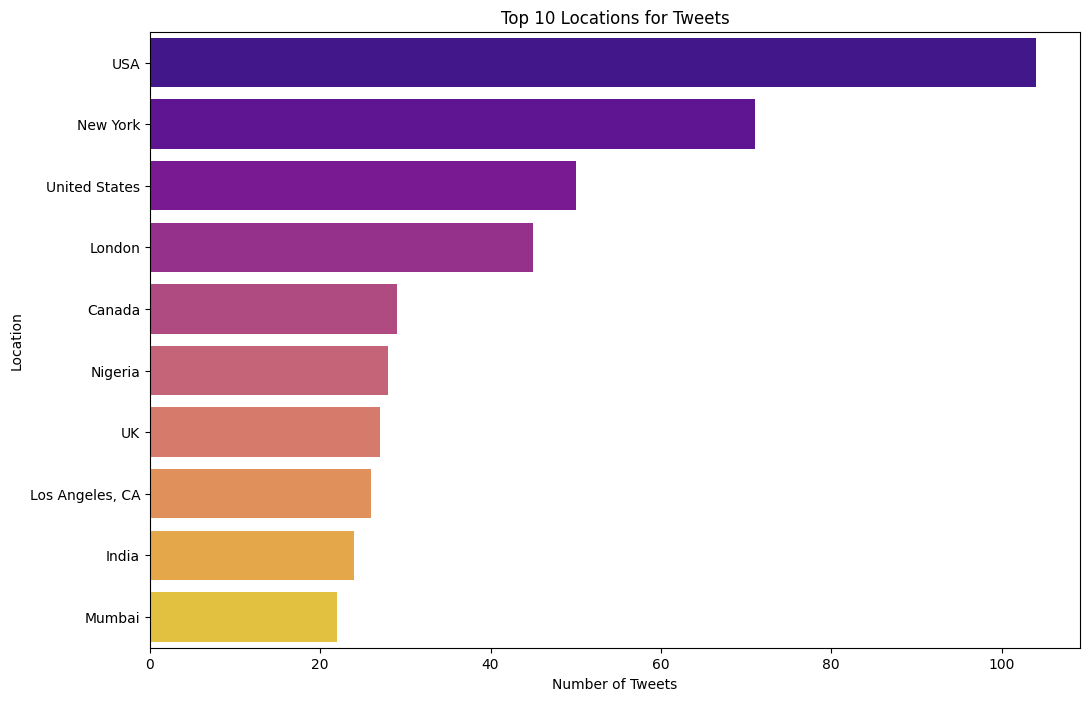

In [188]:
top_locations = final_df["location"].value_counts().head(10)

# Plot settings
plt.figure(figsize=(12, 8))
sns.barplot(x=top_locations.values, y=top_locations.index, palette="plasma")
plt.title("Top 10 Locations for Tweets")
plt.xlabel("Number of Tweets")
plt.ylabel("Location")
plt.show()